# Caso 1, Caso 2

Caso 1 - SVM con kernel polinomial y transformación binaria OVA

Caso 2 - SVM con kernel polinomial y transformación binaria OVO


# Carga de librerias y datos

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
import seaborn as sns
import numpy as np
from sklearn.metrics import fbeta_score
from sklearn.metrics import multilabel_confusion_matrix

df_URL = 'https://drive.google.com/uc?id=1ANiB9LKGQ35oInLOhb6qxAt3eOvlRjnh'      # datos generados con el codigo (1)_data_gathering.ipynb

In [2]:
df = pd.read_csv(df_URL)
display('df.shape : ',df.shape)
display('df head', df.dtypes.to_markdown())

'df.shape : '

(11674, 65)

'df head'

'|               | 0       |\n|:--------------|:--------|\n| Sensor1_1     | float64 |\n| Sensor1_2     | float64 |\n| Sensor1_3     | float64 |\n| Sensor1_4     | float64 |\n| Sensor1_5     | float64 |\n| Sensor1_6     | float64 |\n| Sensor1_7     | float64 |\n| Sensor1_8     | float64 |\n| Sensor2_1     | float64 |\n| Sensor2_2     | float64 |\n| Sensor2_3     | float64 |\n| Sensor2_4     | float64 |\n| Sensor2_5     | float64 |\n| Sensor2_6     | float64 |\n| Sensor2_7     | float64 |\n| Sensor2_8     | float64 |\n| Sensor3_1     | float64 |\n| Sensor3_2     | float64 |\n| Sensor3_3     | float64 |\n| Sensor3_4     | float64 |\n| Sensor3_5     | float64 |\n| Sensor3_6     | float64 |\n| Sensor3_7     | float64 |\n| Sensor3_8     | float64 |\n| Sensor4_1     | float64 |\n| Sensor4_2     | float64 |\n| Sensor4_3     | float64 |\n| Sensor4_4     | float64 |\n| Sensor4_5     | float64 |\n| Sensor4_6     | float64 |\n| Sensor4_7     | float64 |\n| Sensor4_8     | float64 |\n| Sensor5_1  

# Analisis Exploratorio de datos - Caso 1 y Caso 2

Validación para escalar, normalizar o estandarizar

In [3]:
print('Cantidad de observaciones y caracteristicas : ', df.shape)
print('Caracteristicas : ', df.columns)
print('Tipos de datos e id datos nulos :',df.info())                    # Identificación de datos nulos.


Cantidad de observaciones y caracteristicas :  (11674, 65)
Caracteristicas :  Index(['Sensor1_1', 'Sensor1_2', 'Sensor1_3', 'Sensor1_4', 'Sensor1_5',
       'Sensor1_6', 'Sensor1_7', 'Sensor1_8', 'Sensor2_1', 'Sensor2_2',
       'Sensor2_3', 'Sensor2_4', 'Sensor2_5', 'Sensor2_6', 'Sensor2_7',
       'Sensor2_8', 'Sensor3_1', 'Sensor3_2', 'Sensor3_3', 'Sensor3_4',
       'Sensor3_5', 'Sensor3_6', 'Sensor3_7', 'Sensor3_8', 'Sensor4_1',
       'Sensor4_2', 'Sensor4_3', 'Sensor4_4', 'Sensor4_5', 'Sensor4_6',
       'Sensor4_7', 'Sensor4_8', 'Sensor5_1', 'Sensor5_2', 'Sensor5_3',
       'Sensor5_4', 'Sensor5_5', 'Sensor5_6', 'Sensor5_7', 'Sensor5_8',
       'Sensor6_1', 'Sensor6_2', 'Sensor6_3', 'Sensor6_4', 'Sensor6_5',
       'Sensor6_6', 'Sensor6_7', 'Sensor6_8', 'Sensor7_1', 'Sensor7_2',
       'Sensor7_3', 'Sensor7_4', 'Sensor7_5', 'Sensor7_6', 'Sensor7_7',
       'Sensor7_8', 'Sensor8_1', 'Sensor8_2', 'Sensor8_3', 'Sensor8_4',
       'Sensor8_5', 'Sensor8_6', 'Sensor8_7', 'Sensor8_8',

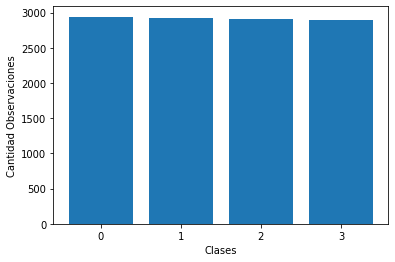

[0 1 2 3]
[2942, 2921, 2909, 2902]


In [4]:
# Validacion balanceo entre clases. Por la cantidad de los datos se excluyen procesos de balanceo para este ejercicio.

x_values = df['GESTURE_CLASS'].unique()
y_values = df['GESTURE_CLASS'].value_counts().tolist()

plt.bar(x_values, y_values)
ax = plt.subplot()
ax.set_xticks(x_values)
ax.set_xticklabels(x_values)
ax.set_xlabel('Clases')
ax.set_ylabel('Cantidad Observaciones')
plt.show()

print(x_values)
print(y_values)

<function matplotlib.pyplot.show(close=None, block=None)>

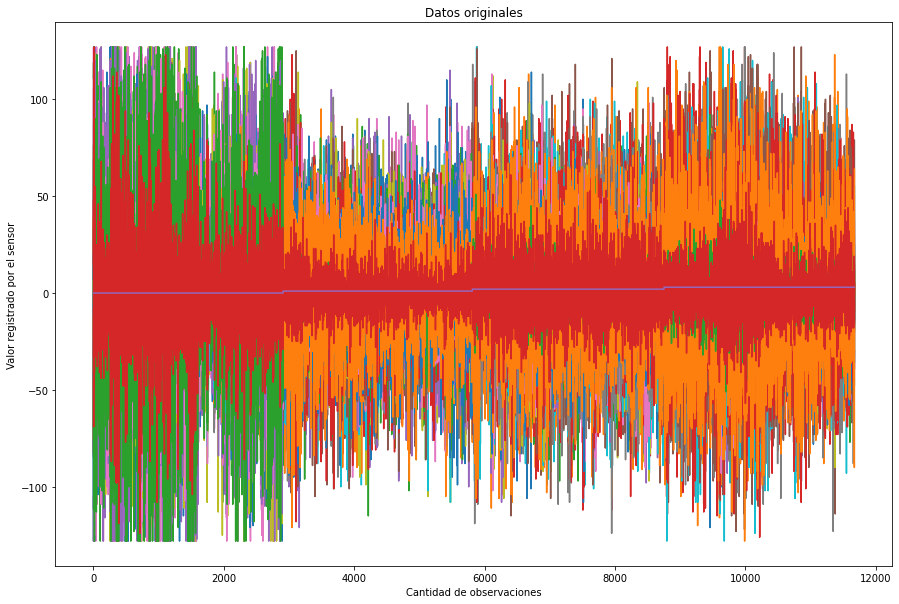

In [5]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1,1,1)
ax1.set_title("Datos originales")
ax1.set_xlabel("Cantidad de observaciones")
ax1.set_ylabel("Valor registrado por el sensor")
ax1.plot(df)
plt.show


In [6]:
# Escalamiento

df_min_max = preprocessing.MinMaxScaler().fit_transform(df)
df_min_max = pd.DataFrame(df_min_max)

df_normalizado = preprocessing.Normalizer().transform(df.T)                            
df_normalizado = df_normalizado.T
df_normalizado = pd.DataFrame(df_normalizado)

df_estandarizado = preprocessing.StandardScaler().fit_transform(df)                     # (X  - media) / dev_std
df_estandarizado = pd.DataFrame(df_estandarizado)

df_estandarizado_iq = preprocessing.RobustScaler().fit_transform(df)                    # (X - rango_intercuartilico) / dev_std - Sin afecta datos atipicos
df_estandarizado_iq = pd.DataFrame(df_estandarizado_iq)

<function matplotlib.pyplot.show(close=None, block=None)>

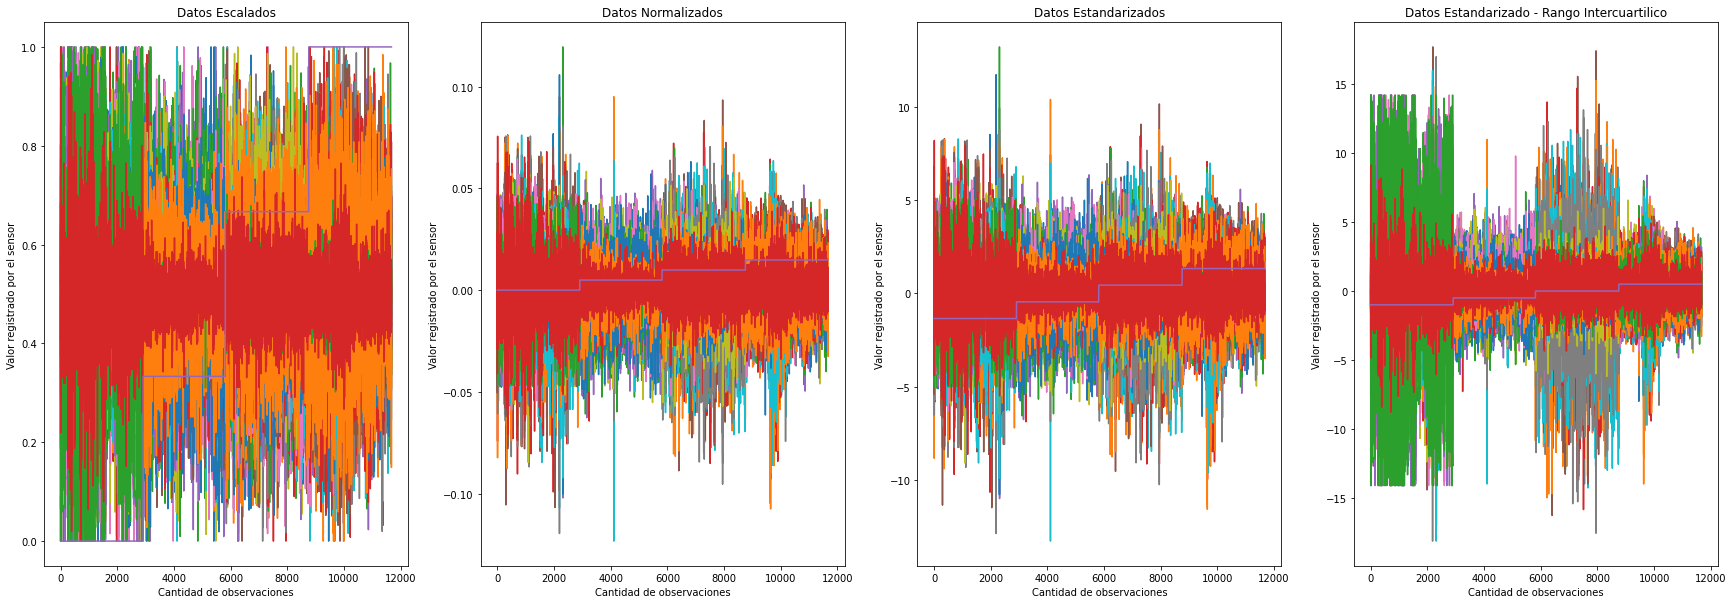

In [7]:
# Grafico de escalacmiento, normalización y estandarizacion

fig = plt.figure(figsize=(30,10))
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)
ax1.set_title("Datos Escalados")
ax1.set_xlabel("Cantidad de observaciones")
ax1.set_ylabel("Valor registrado por el sensor")
ax2.set_title("Datos Normalizados")
ax2.set_xlabel("Cantidad de observaciones")
ax2.set_ylabel("Valor registrado por el sensor")
ax3.set_title("Datos Estandarizados")
ax3.set_xlabel("Cantidad de observaciones")
ax3.set_ylabel("Valor registrado por el sensor")
ax4.set_title("Datos Estandarizado - Rango Intercuartilico")
ax4.set_xlabel("Cantidad de observaciones")
ax4.set_ylabel("Valor registrado por el sensor")
ax1.plot(df_min_max)
ax2.plot(df_normalizado)
ax3.plot(df_estandarizado)
ax4.plot(df_estandarizado_iq)
plt.show

# Division datos entrenamiento, validación y prueba

Entrenamiento: 60%

Validación: 20%

Pruebas: 20%

In [8]:
# Cantidad de observaciones

print('Cantidad de observaciones totales : ', df.shape)
print('60% de datos para entrenamiento : ', (len(df)*0.6))
print('20% de datos para validación    : ', (len(df)*0.2))
print('20% de datos para pruebas       : ', (len(df)*0.2))

Cantidad de observaciones totales :  (11674, 65)
60% de datos para entrenamiento :  7004.4
20% de datos para validación    :  2334.8
20% de datos para pruebas       :  2334.8


In [9]:
# la Libreria scikit-learn genera los datos aleatorios, garantizando que los conjunto sean excluyentes.

X_train, X_test, y_train, y_test = train_test_split(df, df["GESTURE_CLASS"], test_size=0.20)     # datos para prueba en X_test - y_test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)              # datos para entrenamiento X_train - y_train  / validación en X_val - Y_val


In [10]:
print('Cantidad de datos entrenamiento : ', X_train.shape)
print('Cantidad de clase entrenamiento : ', y_train.shape)
print('Cantidad datos validacion : ', X_val.shape)
print('Cantidad clase validacion : ', y_val.shape)
print('Cantidad de datos prueba : ', X_test.shape)
print('Cantidad de clases prueba : ', y_test.shape)

Cantidad de datos entrenamiento :  (7004, 65)
Cantidad de clase entrenamiento :  (7004,)
Cantidad datos validacion :  (2335, 65)
Cantidad clase validacion :  (2335,)
Cantidad de datos prueba :  (2335, 65)
Cantidad de clases prueba :  (2335,)


# Modelos

## Caso 1 - SVM con kernel polinomial y transformación binaria OVA

### Informacion hiperparametros

Regularización - "Valores de C"

https://stats.stackexchange.com/questions/31066/what-is-the-influence-of-c-in-svms-with-linear-kernel

En una SVM, está buscando dos cosas: un hiperplano con el margen mínimo más grande y un hiperplano que separe correctamente tantas instancias como sea posible. El problema es que no siempre podrás conseguir ambas cosas. El parámetro c determina qué tan grande es tu deseo por este último. He dibujado un pequeño ejemplo a continuación para ilustrar esto. A la izquierda tiene una c baja que le da un margen mínimo bastante grande (púrpura). Sin embargo, esto requiere que descuidemos el valor atípico del círculo azul que no hemos podido clasificar correctamente. A la derecha tienes una c alta. Ahora no descuidará el valor atípico y, por lo tanto, terminará con un margen mucho más pequeño.

<img src="https://i.stack.imgur.com/GbW5S.png">

Respecto de valores de Gamma tenemos:

Un menor gamma implica una mayor distancia entre las observaciones que separan los subespacios del SVM luego la estimación es más conservadora.

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/9b129b86be238293edd3331fac8937f0311c69a5">

In [11]:
# Aplicación de RobustScaler, buscando que los outliers no afecten los proceso de entrenamiento

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_val = scaler.fit_transform(X_val)

In [12]:
# Aplicación del clasificador datos de entrenamiento

model_1 = svm.SVC(kernel='poly',decision_function_shape='ovr', degree=3, C=2, gamma='auto')
model_1.fit(X_train, y_train)
model_2 = svm.SVC(kernel='poly',decision_function_shape='ovr', degree=4, C=2, gamma='auto')
model_2.fit(X_train, y_train)
model_3 = svm.SVC(kernel='poly',decision_function_shape='ovr', degree=6, C=2, gamma='auto')
model_3.fit(X_train, y_train)

SVC(C=2, degree=6, gamma='auto', kernel='poly')

In [13]:
# Tabla de resultados según el cambio del orden

print('Model 1 : ', model_1.score(X_val, y_val))
print('Model 2 : ', model_2.score(X_val, y_val))
print('Model 3 : ', model_3.score(X_val, y_val))

Model 1 :  0.728051391862955
Model 2 :  0.7635974304068522
Model 3 :  0.6115631691648822


In [14]:
y_pred = model_2.predict(X_test)                               # Evaluación del modelo con los datos de prueba.

In [15]:
reporte = classification_report(y_test, y_pred)

In [16]:
print(reporte)


              precision    recall  f1-score   support

           0       0.93      0.89      0.91       579
           1       0.57      0.99      0.72       596
           2       0.96      0.73      0.83       593
           3       0.88      0.45      0.59       567

    accuracy                           0.77      2335
   macro avg       0.84      0.77      0.76      2335
weighted avg       0.83      0.77      0.77      2335



In [17]:
fbeta_score(y_test, y_pred, average='macro', beta=0.5)                                                                          #f-beta - mas importancia al recall que a la preción.

0.7969185257972592

Text(33.0, 0.5, 'Valores verdaderos')

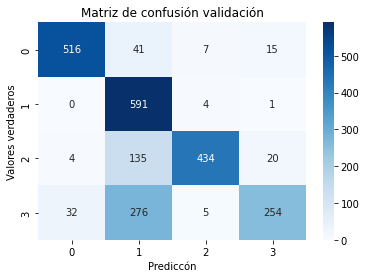

In [19]:
# Matrix de confusion - Datos de validacion

cm = confusion_matrix(y_test, y_pred, labels=[0,1,2,3])
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

ax.set_title('Matriz de confusión validación')

ax.set_xlabel('Prediccón')
ax.set_ylabel('Valores verdaderos')


## Caso 2 - SVM con kernel polinomial y transformación binaria OVO

In [21]:
# Aplicación del clasificador datos de entrenamiento

model_4 = svm.SVC(kernel='poly',decision_function_shape='ovo', degree=3,C=2, gamma='auto')
model_4.fit(X_train, y_train)
model_5 = svm.SVC(kernel='poly',decision_function_shape='ovo', degree=4,C=2, gamma='auto')
model_5.fit(X_train, y_train)
model_6 = svm.SVC(kernel='poly',decision_function_shape='ovo', degree=6,C=2, gamma='auto')
model_6.fit(X_train, y_train)

SVC(C=2, decision_function_shape='ovo', degree=6, gamma='auto', kernel='poly')

In [22]:
# Tabla de resultados según el cambio del orden

print('Model 4 : ', model_4.score(X_val, y_val))
print('Model 5 : ', model_5.score(X_val, y_val))
print('Model 6 : ', model_6.score(X_val, y_val))

Model 4 :  0.728051391862955
Model 5 :  0.7635974304068522
Model 6 :  0.6115631691648822


In [23]:
y_pred_2 = model_2.predict(X_test)          

In [24]:
reporte_2 = classification_report(y_test, y_pred_2)

In [25]:
print(reporte_2)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       579
           1       0.57      0.99      0.72       596
           2       0.96      0.73      0.83       593
           3       0.88      0.45      0.59       567

    accuracy                           0.77      2335
   macro avg       0.84      0.77      0.76      2335
weighted avg       0.83      0.77      0.77      2335



In [26]:
fbeta_score(y_test, y_pred, average='macro', beta=0.5)

0.7969185257972592

Text(33.0, 0.5, 'Valores verdaderos')

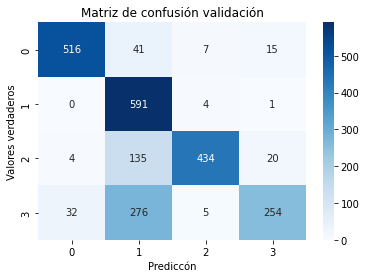

In [27]:
# Matrix de confusion - Datos de validacion

cm2 = confusion_matrix(y_test, y_pred_2, labels=[0,1,2,3])
ax = plt.subplot()
sns.heatmap(cm2, annot=True, ax = ax, cmap='Blues', fmt="d")

ax.set_title('Matriz de confusión validación')

ax.set_xlabel('Prediccón')
ax.set_ylabel('Valores verdaderos')

# Conclusiones

- Las metricas F1 Score se utilizo para obtener un valor unico y ponderado frente a la presición del modelo y el recall. en nuestro caso no presnta cambios representativos bajo las prespectivas OVO y OVA.
- Se utilizo la metrica f-beta buscando dando mas importancia al Recall que a la presición obteniendo valores de 76%
- Debido al caso en particular se considera utilizar el valor de f-beta como metrica para evaluar los modelos.